<a href="https://colab.research.google.com/github/RishankSoni/es335-assignment-1/blob/main/HAR_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Preprocessing

# !unzip colab_folder.zip -d dataset

# !python /content/dataset/colab_folder/"UCI HAR Dataset"/CombineScript.py

# !python /content/dataset/colab_folder/"UCI HAR Dataset"/MakeDataset.py

# !pip install tsfel

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

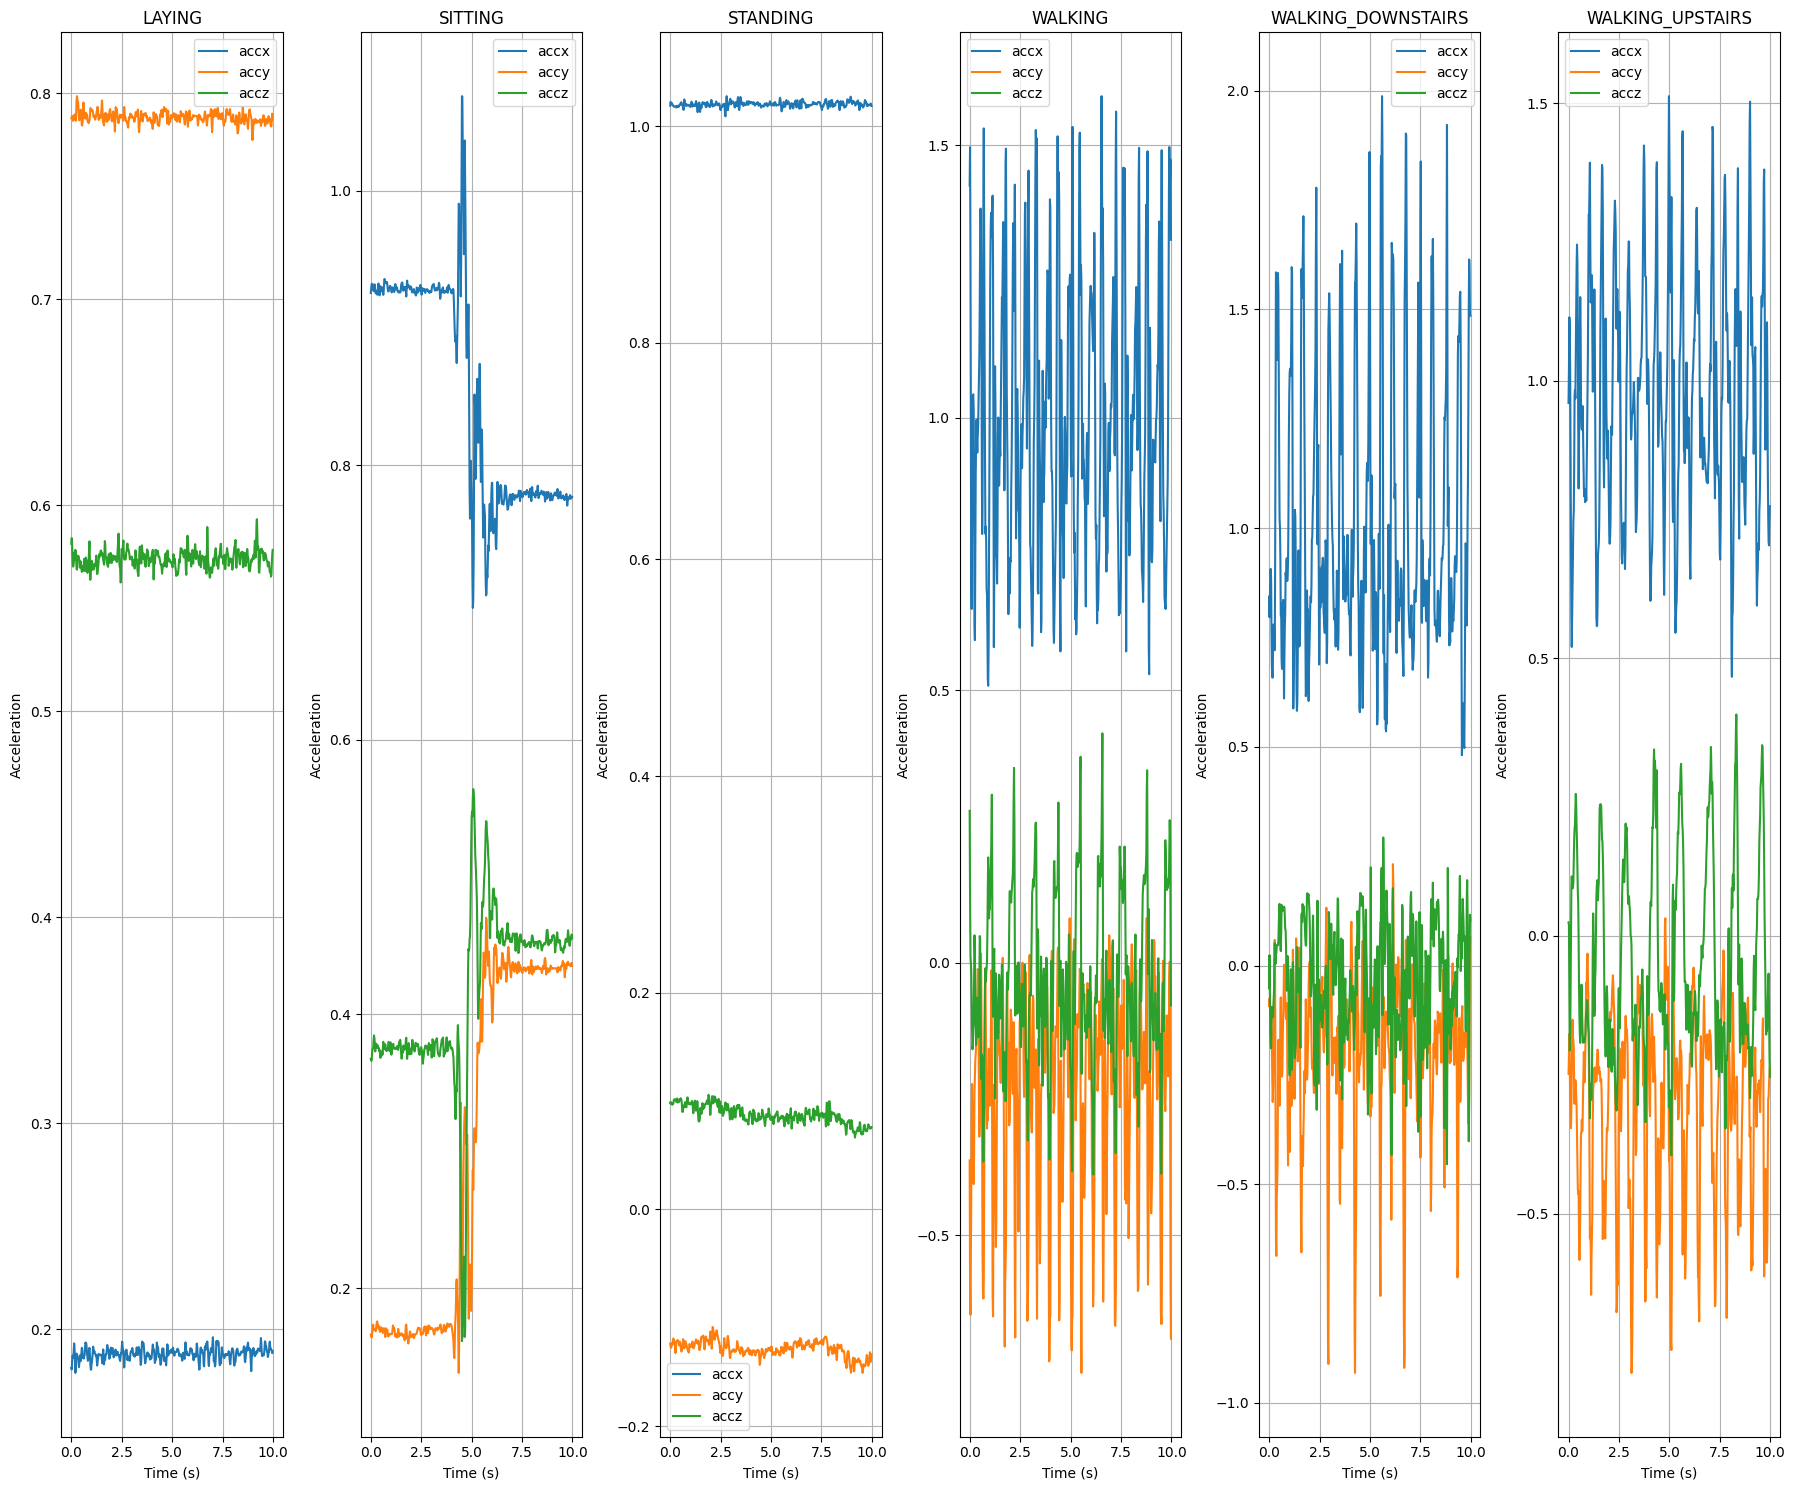

In [11]:
# HAR Task 1 EDA Question 1

activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

subjects = ["Subject_1", "Subject_11", "Subject_14", "Subject_15", "Subject_16", "Subject_17", "Subject_19", "Subject_21", "Subject_22", "Subject_23", "Subject_25", "Subject_26", "Subject_27", "Subject_28", "Subject_29", "Subject_3", "Subject_30", "Subject_5", "Subject_6", "Subject_7", "Subject_8"]

freq = 50

n = 500

plt.figure(figsize=(18, 15))

for i in range(len(activities)):

  df = pd.read_csv(f"/content/Combined/Train/{activities[i]}/Subject_1.csv").iloc[:n]
  time = np.arange(len(df)) / freq

  plt.subplot(1, 6, i+1)
  plt.plot(time, df["accx"], label="accx")
  plt.plot(time, df["accy"], label="accy")
  plt.plot(time, df["accz"], label="accz")

  plt.title(activities[i])
  plt.xlabel("Time (s)")
  plt.ylabel("Acceleration")
  plt.legend()
  plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# PCA function

# PCA

def PCA(m):

  cov_mat = np.cov(m, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)
  sort_i = np.argsort(eigenvalues)[::-1]
  eigen_vals = eigenvalues[sort_i]
  eigenvectors = eigenvectors[:, sort_i]
  eigenvectors2 = eigenvectors[:, 0:2]
  m2col = np.dot(m, eigenvectors2)

  return m2col

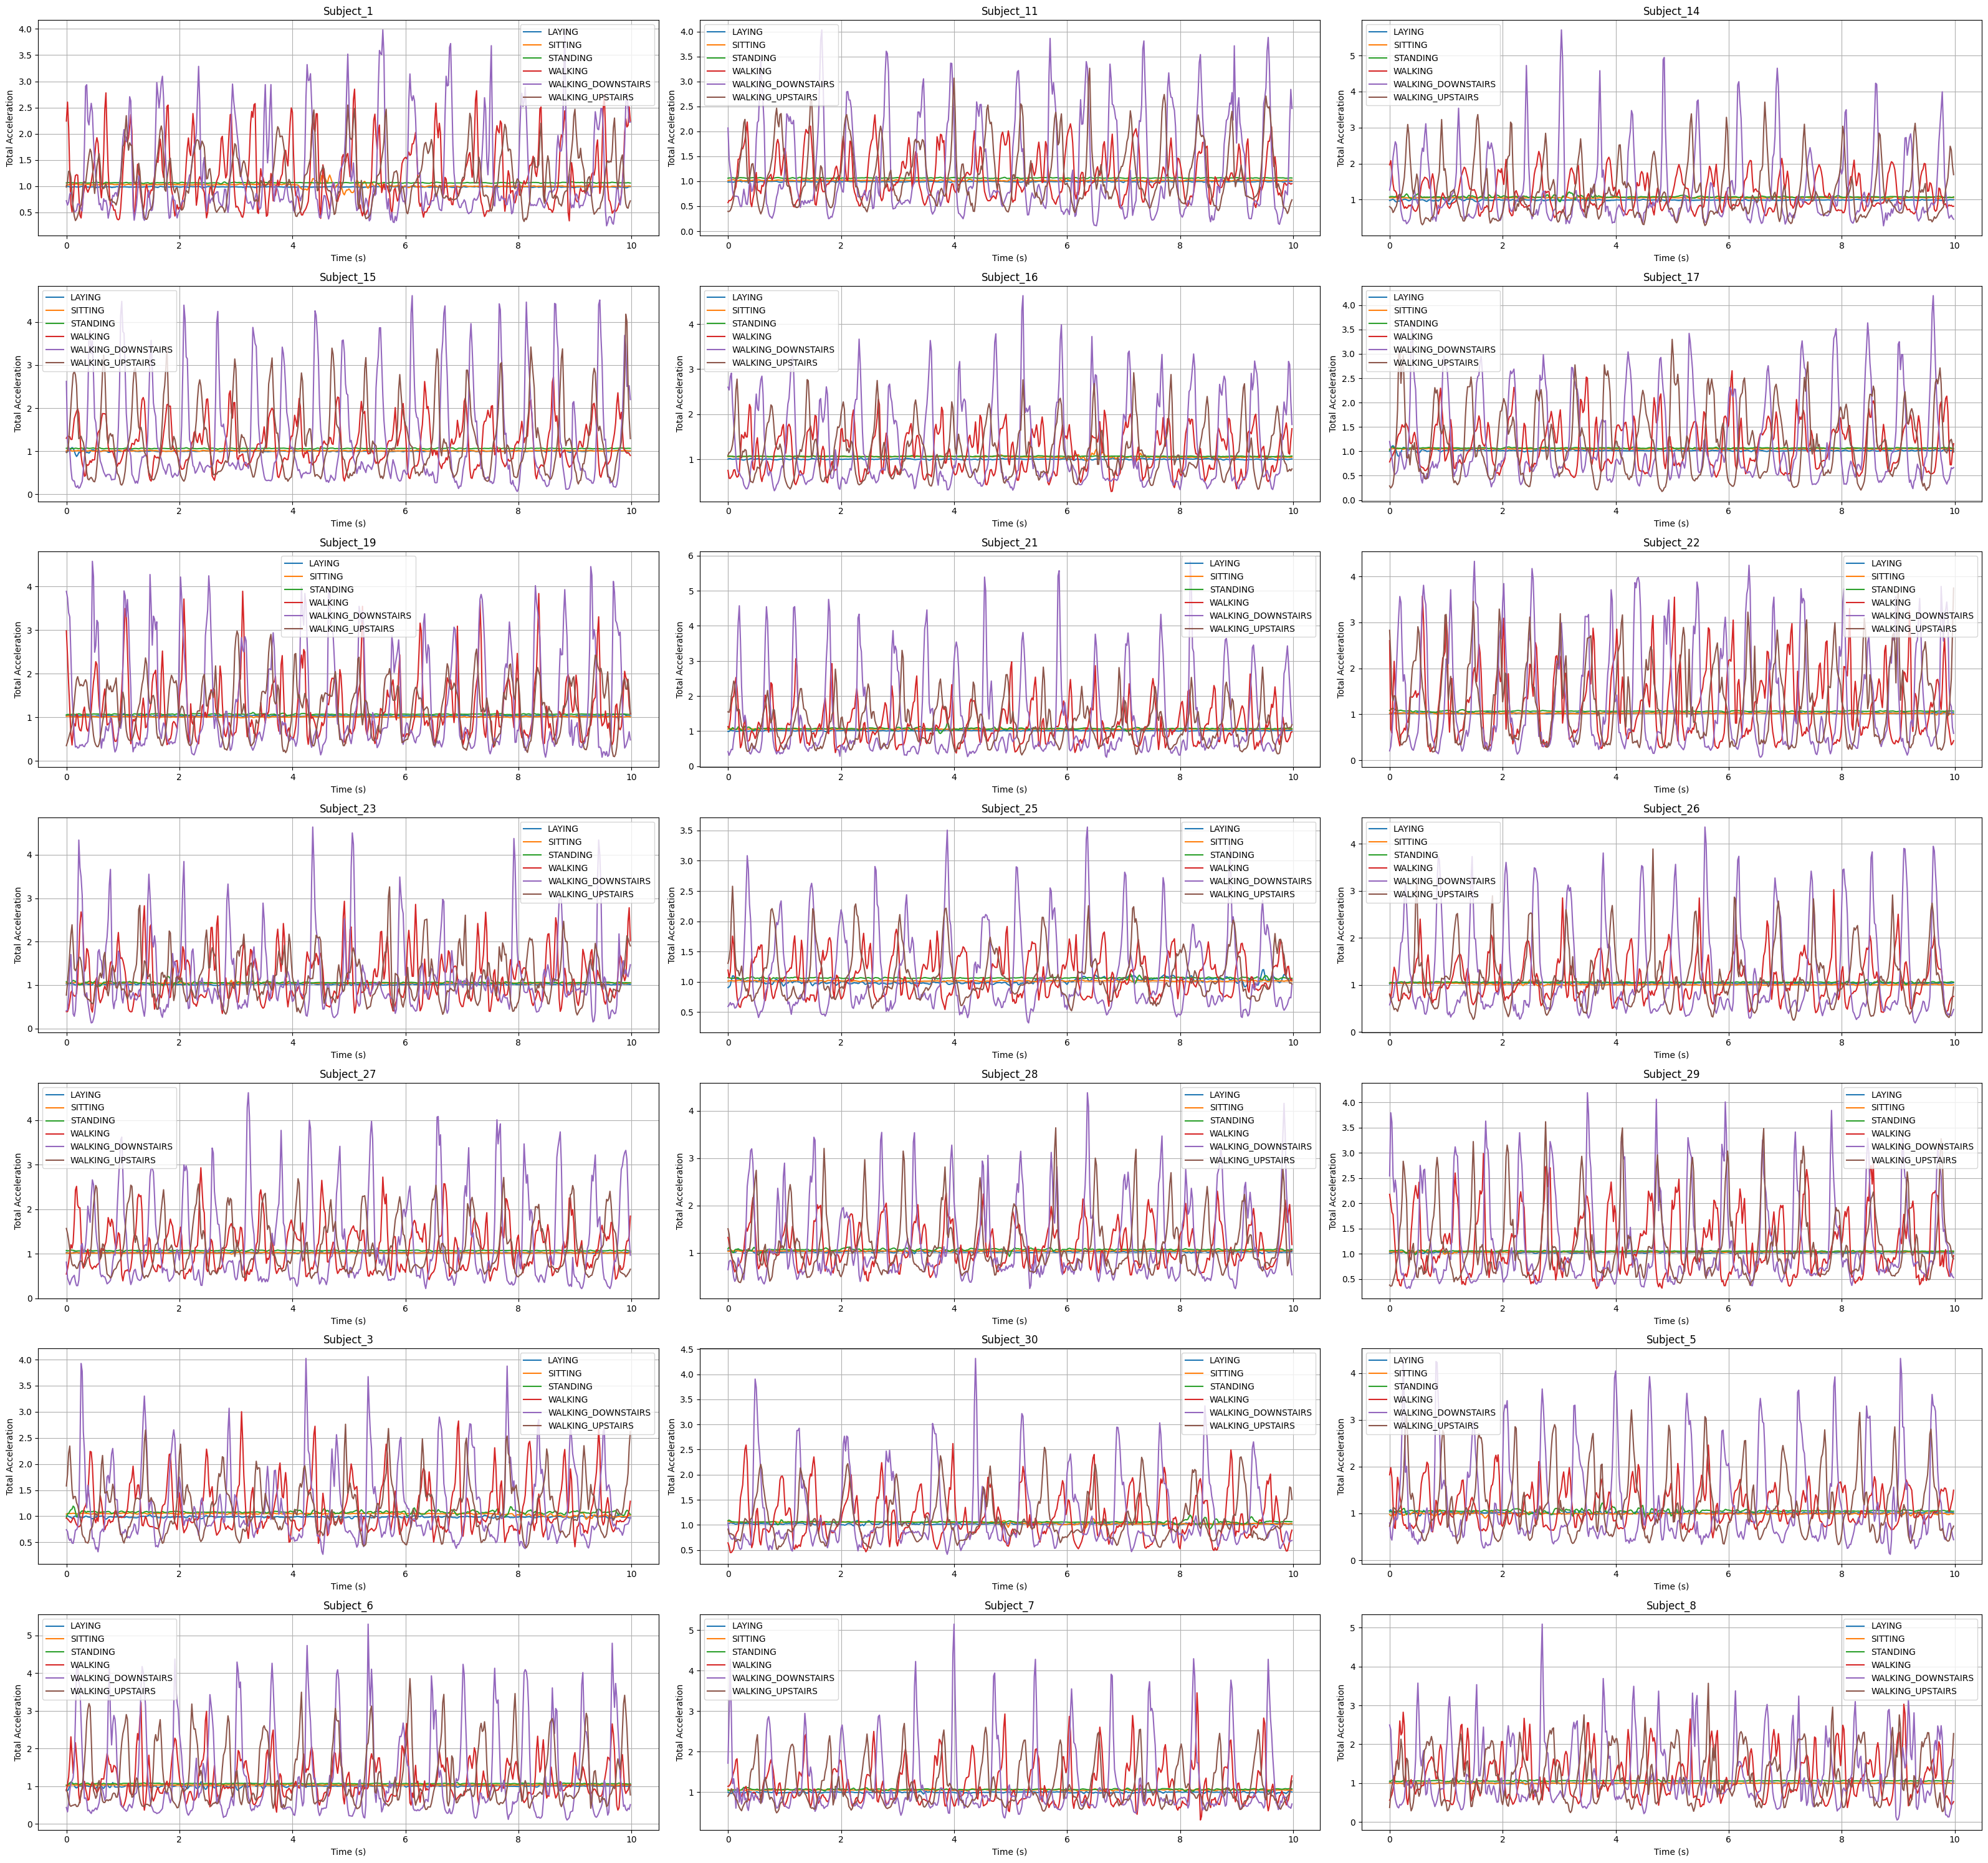

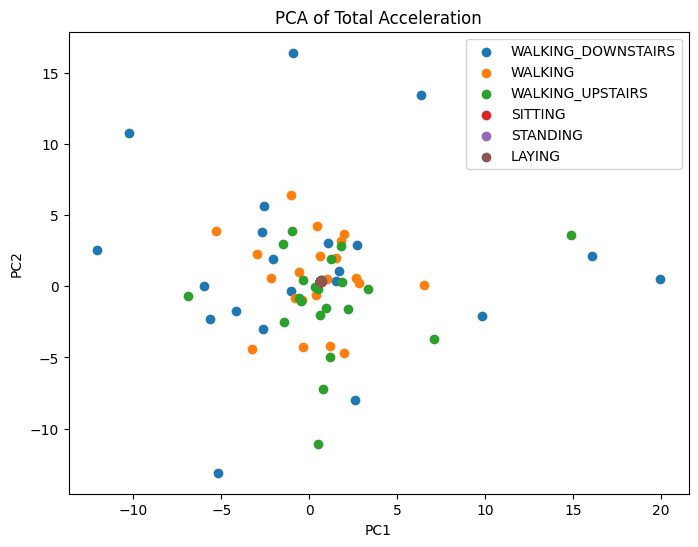

In [27]:
# HAR Task 1 EDA Question 2 and 3 (a)

m = np.zeros((126, 500))
labels = []   # activity label for each row in m
ri = 0

plt.figure(figsize=(32, 30))

for i in range(len(subjects)):

  for j in range(len(activities)):

    plt.subplot(7, 3, i+1)  # 3 rows, 3 cols of subplots
    df = pd.read_csv(f"/content/Combined/Train/{activities[j]}/{subjects[i]}.csv").iloc[:n]
    time = np.arange(len(df)) / freq
    df2 = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

    m[ri, :] = df2.values
    labels.append(activities[j])   # assign activity label
    ri += 1

    plt.plot(time, df2, label=f"{activities[j]}")
    plt.title(subjects[i])
    plt.xlabel("Time (s)")
    plt.ylabel("Total Acceleration")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

PCAm = PCA(m)

# Plot PCA
for activity in set(activities):
    i = [k for k, act in enumerate(labels) if act == activity]
    plt.scatter(PCAm[i, 0], PCAm[i, 1], label = activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Total Acceleration")
plt.legend()
print("\n")
plt.show()

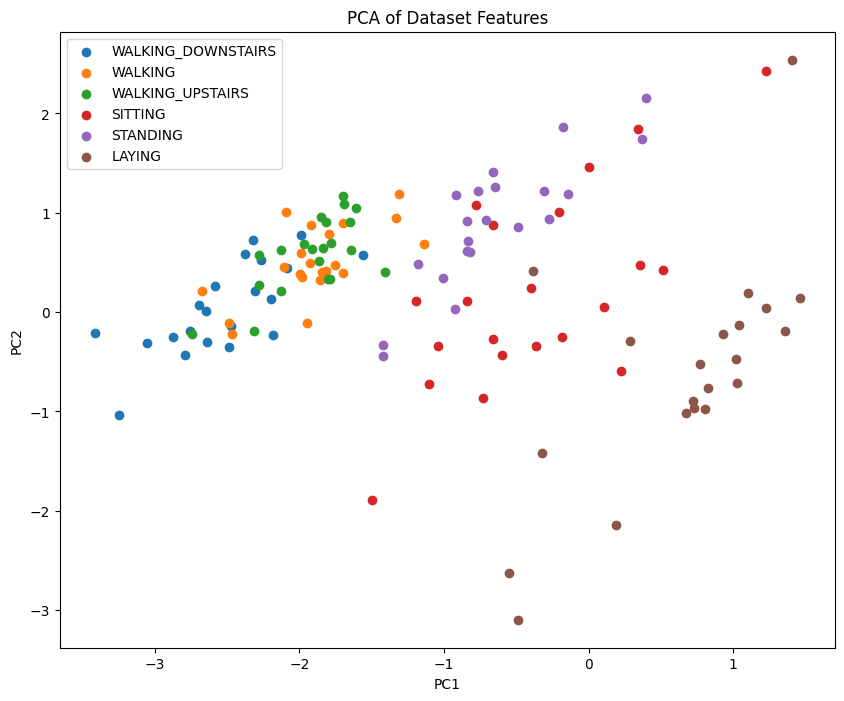


 [[ 1.         -0.77089582 -0.61898056  0.42201568  0.26542099  0.38692239
   0.82786847 -0.70017615 -0.44632944  0.72564389 -0.6734722  -0.58593032
   0.11872094 -0.17014061  0.0438678 ]
 [-0.77089582  1.          0.73692374 -0.55708919 -0.50867613 -0.57432331
  -0.78125115  0.84634943  0.49324887 -0.37385023  0.90084574  0.73433074
  -0.18078205  0.09061597  0.04380924]
 [-0.61898056  0.73692374  1.         -0.43496177 -0.32443308 -0.53058123
  -0.63306145  0.63606245  0.84903279 -0.31160619  0.66994077  0.91892908
  -0.07815503  0.1914443   0.10545392]
 [ 0.42201568 -0.55708919 -0.43496177  1.          0.79780145  0.80646165
   0.84412383 -0.12092855  0.00706028 -0.29162361 -0.82611898 -0.67060007
   0.39905028 -0.49332964 -0.17421441]
 [ 0.26542099 -0.50867613 -0.32443308  0.79780145  1.          0.83891202
   0.62350607 -0.0072827   0.09401999 -0.32896774 -0.76431598 -0.56128619
   0.32251459 -0.35073833 -0.14891746]
 [ 0.38692239 -0.57432331 -0.53058123  0.80646165  0.83891202  

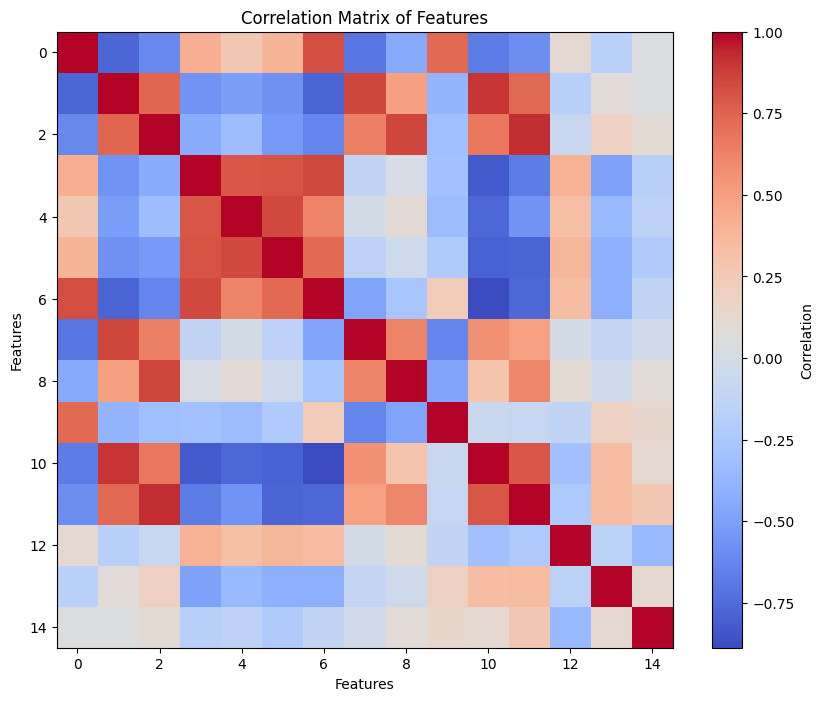

In [45]:
# HAR Task 1 EDA Question 3 (c) and 4

feat_matrix = np.zeros((126, 15))
labels_act = []
ri = 0
# col = pd.read_csv("/content/features.txt", delim_whitespace=True)

for i in range(len(subjects)):

  for j in range(len(activities)):

      row = []

      data = pd.read_csv(f"/content/Combined/Train/{activities[j]}/{subjects[i]}.csv").iloc[:n]

      row.append(data["accx"].mean())
      row.append(data["accy"].mean())
      row.append(data["accz"].mean())
      row.append(data["accx"].std())
      row.append(data["accy"].std())
      row.append(data["accz"].std())
      row.append(data["accx"].max())
      row.append(data["accy"].max())
      row.append(data["accz"].max())
      row.append(data["accx"].min())
      row.append(data["accy"].min())
      row.append(data["accz"].min())
      row.append(data["accx"].skew())
      row.append(data["accy"].skew())
      row.append(data["accz"].skew())

      feat_matrix[ri, :] = row

      ri += 1

      labels_act.append(activities[j])

PCAfm = PCA(feat_matrix)

plt.figure(figsize=(10, 8))

# Plot PCA
for activity in set(activities):
    i = [k for k, act in enumerate(labels_act) if act == activity]
    plt.scatter(PCAfm[i, 0], PCAfm[i, 1], label = activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Dataset Features")
plt.legend()
plt.show()

corr_matrix = np.corrcoef(feat_matrix, rowvar=False)
print("\n",corr_matrix, "\n")

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Add labels
plt.title("Correlation Matrix of Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


/tmp/ipython-input-541651415.py:12: UserWarning: Using default sampling frequency set in configuration file.
  featst = tsfel.time_series_features_extractor(cfg, dftsfel)


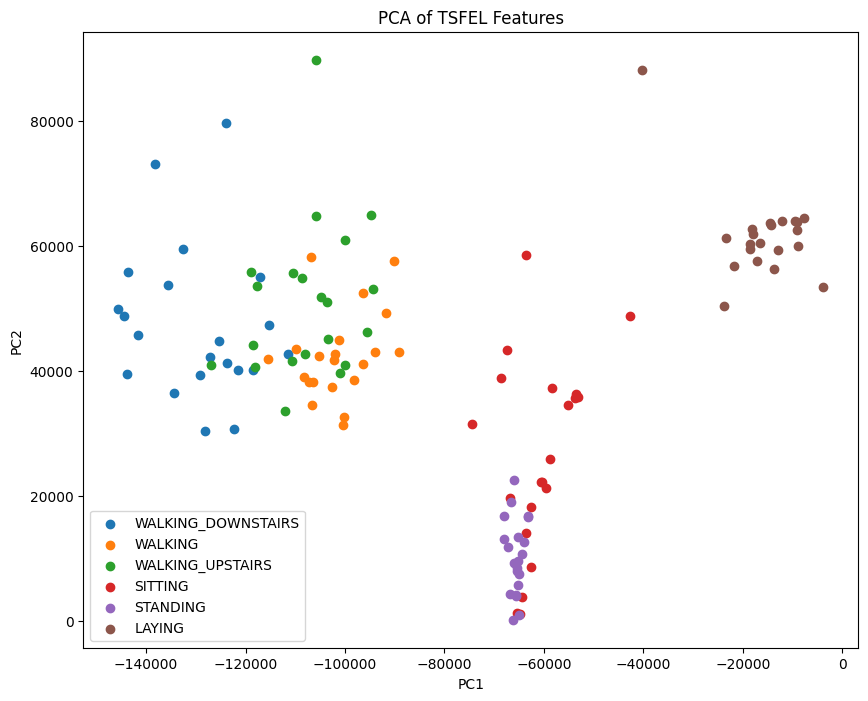

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



 [[ 1.         -0.77089582 -0.61898056  0.42201568  0.26542099  0.38692239
   0.82786847 -0.70017615 -0.44632944  0.72564389 -0.6734722  -0.58593032
   0.11872094 -0.17014061  0.0438678 ]
 [-0.77089582  1.          0.73692374 -0.55708919 -0.50867613 -0.57432331
  -0.78125115  0.84634943  0.49324887 -0.37385023  0.90084574  0.73433074
  -0.18078205  0.09061597  0.04380924]
 [-0.61898056  0.73692374  1.         -0.43496177 -0.32443308 -0.53058123
  -0.63306145  0.63606245  0.84903279 -0.31160619  0.66994077  0.91892908
  -0.07815503  0.1914443   0.10545392]
 [ 0.42201568 -0.55708919 -0.43496177  1.          0.79780145  0.80646165
   0.84412383 -0.12092855  0.00706028 -0.29162361 -0.82611898 -0.67060007
   0.39905028 -0.49332964 -0.17421441]
 [ 0.26542099 -0.50867613 -0.32443308  0.79780145  1.          0.83891202
   0.62350607 -0.0072827   0.09401999 -0.32896774 -0.76431598 -0.56128619
   0.32251459 -0.35073833 -0.14891746]
 [ 0.38692239 -0.57432331 -0.53058123  0.80646165  0.83891202  

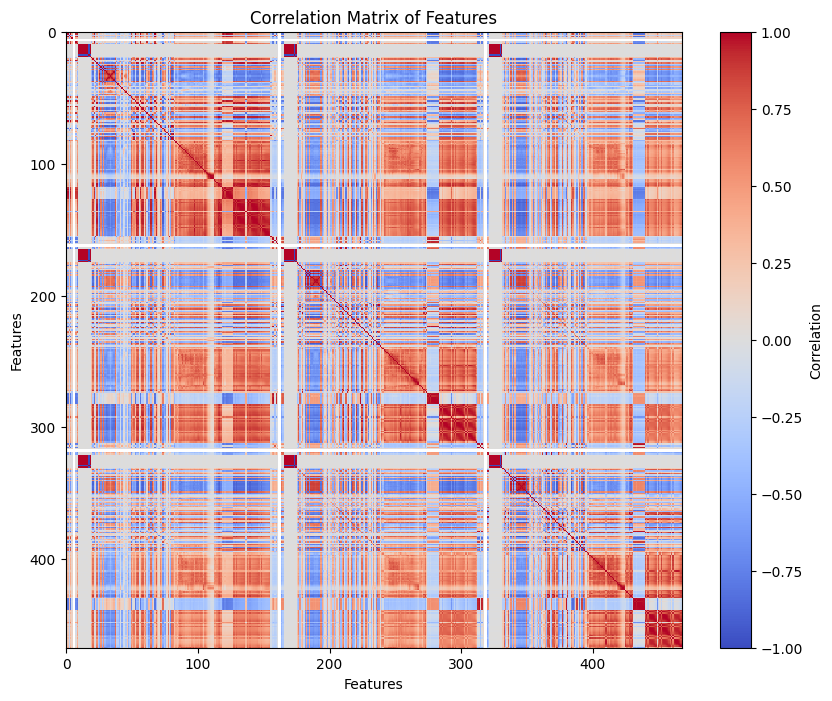

In [68]:
# HAR Task 1 EDA Question 3 (b) and 4

cfg = tsfel.get_features_by_domain()

feat_matrixt = np.zeros((126, 468))
labels_act2 = []
ri = 0

for i in range(len(subjects)):

  for j in range(len(activities)):

    dftsfel = pd.read_csv(f"/content/Combined/Train/{activities[j]}/{subjects[i]}.csv").iloc[:n]
    featst = tsfel.time_series_features_extractor(cfg, dftsfel)
    rowt = featst.values.flatten()
    # n_feats = featst.values.flatten().shape[0]
    # print(n_feats)
    labels_act2.append(activities[j])

    feat_matrixt[ri, :] = rowt

    ri += 1

PCAdftsfel = PCA(feat_matrixt)

plt.figure(figsize=(10, 8))

# Plot PCA
for activity in set(activities):
    i = [k for k, act in enumerate(labels_act2) if act == activity]
    plt.scatter(PCAdftsfel[i, 0], PCAdftsfel[i, 1], label = activity)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of TSFEL Features")
plt.legend()
plt.show()

corr_matrixt = np.corrcoef(feat_matrixt, rowvar=False)
print("\n",corr_matrix, "\n")

plt.figure(figsize=(10,8))
plt.imshow(corr_matrixt, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Add labels
plt.title("Correlation Matrix of Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()